<a href="https://colab.research.google.com/github/abdelrahmanfekri/Jaundice_detection_using_deep_learning/blob/main/jaundice_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 11.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116951 sha256=69e6a941485e920dd4546eb3307f2dc88308df81a9ba9e0e2a6559293efd00a5
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


In [70]:
pip install retinaface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.6/863.6 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB

In [71]:
from retinaface import RetinaFace
detector = RetinaFace()

model[normal quality] init ..
model success !


In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Run face detection on the input image using RetinaFace

In [73]:
def detect_face_eyes(img):
    faces = detector.predict(img)
    # Loop over the detected faces
    (face_img, left_eye, right_eye) = ([], [], [])
    for face in faces:
        # Extract the coordinates of the face bounding box
        x1 = face.get("x1")
        y1 = face.get("y1")
        x2 = face.get("x2")
        y2 = face.get("y2")
        # Draw the face bounding box on the input image
        face_img = img[y1:y2,x1:x2]

        # Extract the coordinates of the eye landmarks
        left_eye_coords = face.get('left_eye')
        right_eye_coords = face.get('right_eye')

        # Draw the eye landmarks on the input image
        dx = 60
        dy = 40
        left_eye = img[left_eye_coords[1]-dy:left_eye_coords[1]+dy,left_eye_coords[0]-dx:left_eye_coords[0]+dx]
        right_eye = img[right_eye_coords[1]-dy:right_eye_coords[1]+dy,right_eye_coords[0]-dx:right_eye_coords[0]+dx]
    return (face_img, left_eye, right_eye)



# Add Images to the dataset
## Face Images, left and right eyies images
I uploaded the dataset from google images about 50 images so we need to increase this dataset by adding the detected face, left eye and right eye.

In [74]:
# import os

# directory = "/content/drive/MyDrive/Jaundice/Jaundice_Dataset/Jaundice"

# for filename in os.listdir(directory):
#     if os.path.isfile(os.path.join(directory, filename)):
#       try:
#         img = cv2.imread(directory+"/"+filename)
#         (face, left_eye , right_eye ) = detect_face_eyes(img)
#         if face is not None and face.size!= 0:
#           cv2.imwrite(directory+"/face_"+filename, face)
#           img, skin_region = detect_skin(face)
#           cv2.imwrite(directory+"/face_skin_"+filename, skin_region)
          
#         if left_eye is not None and left_eye.size!= 0:
#           cv2.imwrite(directory+"/left_eye_"+filename, left_eye)
#           img, scelra_region = detect_skin(left_eye)
#           cv2.imwrite(directory+"/face_scelra_left_"+filename, scelra_region)

#         if right_eye is not None and right_eye.size!= 0:
#           cv2.imwrite(directory+"/right_eye_"+filename, right_eye)
#           img, scelra_region = detect_skin(left_eye)
#           cv2.imwrite(directory+"/face_scelra_right_"+filename, scelra_region)

#       except Exception as e:
#         print(e)


In [75]:
# load data
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = "/content/drive/MyDrive/Jaundice/Jaundice_Dataset"

img_rows = 240
img_cols = 240
batch_size = 32
train_data = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    image_size=[img_rows, img_cols],
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
)

Found 341 files belonging to 2 classes.


In [76]:
train_data.class_names

['Jaundice', 'No_Jaundice']

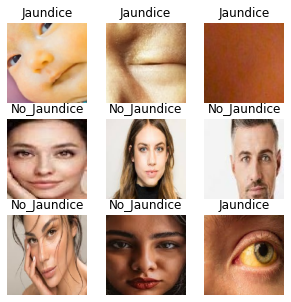

In [77]:
for images, labels in train_data.take(1):
  fig, axs = plt.subplots(3,3, figsize =(5,5))
  axs = axs.flatten()
  idx = 0
  for img, ax in zip(images[:9], axs):
    ax.imshow(img.numpy().astype("uint8"))
    ax.set_title(train_data.class_names[labels[idx]])
    idx+=1
    ax.axis('off')
  plt.show()


In [84]:
# create the model
import tensorflow
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout

num_classes = 2

# Load the VGG16 model
vgg16 = VGG16(weights="imagenet",  include_top=False, input_shape=(img_rows, img_cols, 3))

# Freeze the layers in the base model
for layer in vgg16.layers:
    layer.trainable = False

model = keras.Sequential([
    vgg16,
])
# Head

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1605696   
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                      

In [85]:
def convert_to_float(image, label):
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  return image, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = (
    train_data
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0,1]
    rotation_range=30,  # rotate images randomly by up to 10 degrees
    width_shift_range=0.4,  # shift images horizontally by up to 40%
    height_shift_range=0.4,  # shift images vertically by up to 40%
    shear_range=0.3,  # shear images by up to 30%
    zoom_range=0.3,  # zoom in on images by up to 30%
    horizontal_flip=True,  # flip images horizontally with 50% probability
    fill_mode='nearest',  # fill in any gaps in the images using the nearest pixel
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='rgb',
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 341 images belonging to 2 classes.


In [87]:
from tensorflow.keras.optimizers import Adam
model.compile(
    loss="categorical_crossentropy",
     optimizer = Adam(lr=0.0001), 
     metrics = ["accuracy"]
     )

In [88]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Jaundice/jaundice_model.h5',
                             monitor='accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]
nb_train_samples = 341
epochs = 100
batch_size = 32

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.1580 - accuracy: 0.5750
Epoch 1: accuracy improved from -inf to 0.57500, saving model to /content/drive/MyDrive/Jaundice/jaundice_model.h5
10/10 [==============================] - 8s 526ms/step - loss: 1.1580 - accuracy: 0.5750
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.7955 - accuracy: 0.6602
Epoch 2: accuracy improved from 0.57500 to 0.66019, saving model to /content/drive/MyDrive/Jaundice/jaundice_model.h5
10/10 [==============================] - 7s 743ms/step - loss: 0.7955 - accuracy: 0.6602
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 1.0004 - accuracy: 0.5663
Epoch 3: accuracy did not improve from 0.66019
10/10 [==============================] - 6s 525ms/step - loss: 1.0004 - accuracy: 0.5663
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.8535 - accuracy: 0.6246
Epoch 4: accuracy did not improve from 0.66019
10/10 [===================

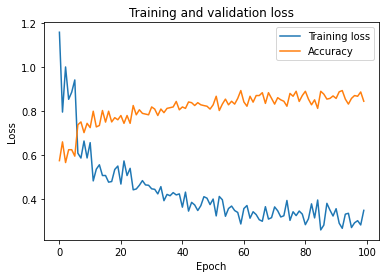

In [92]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Improving model performance

In [95]:
def detect_skin(img):
    # Constants for finding range of skin color in YCrCb
    min_YCrCb = np.array([0,133,77],np.uint8)
    max_YCrCb = np.array([255,173,127],np.uint8)

    # Convert image to YCrCb
    imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

    # Find region with skin tone in YCrCb image
    skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

    return skinRegion

def detect_scelra(img):
    # Convert the Image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Applying thresholding to the grayscale to segment the sclera
    ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    return thresh

In [96]:
# load data
# adding preprocessing to the data
# skin and scelra segmentation

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt


train_data_dir = "/content/drive/MyDrive/Jaundice/Jaundice_Dataset"

img_rows = 240
img_cols = 240
batch_size = 32

def preprocess_image(img):
    # Detect scelra
    scelra_image = detect_scelra(img)
    # Detect skin
    skin_image = detect_skin(img)
    # Convert the images to float
    scelra_image = scelra_image.astype('float32') / 255.0
    skin_image = skin_image.astype('float32') / 255.0
    img = img.astype('float32') / 255.0
    # Resize the images to match the VGG16 input size
    scelra_image = cv2.resize(scelra_image, (img_rows, img_cols))
    skin_image = cv2.resize(skin_image, (img_rows, img_cols))
    img = cv2.resize(img, (img_rows, img_cols))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Reshape the image to add the channel dimension
    img = img.reshape((240, 240, 1)) 
    # Stack the images along the channels axis
    img = np.dstack([img, scelra_image, skin_image])
    # Add a new axis for the batch dimension
    img = np.expand_dims(img, axis=0)
    return img

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)

train_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)


Found 341 images belonging to 2 classes.


Images shape: (32, 240, 240, 3)
Labels shape: (32, 2)


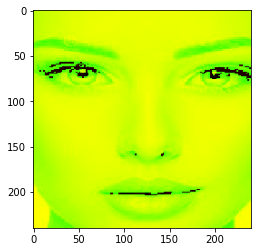

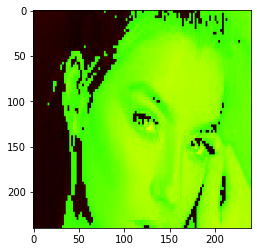

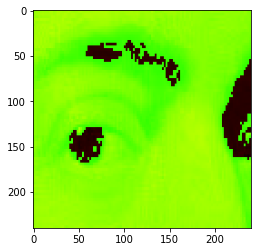

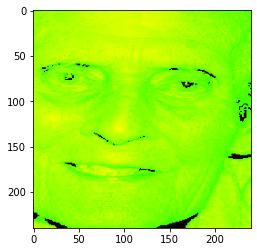

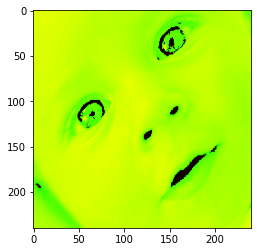

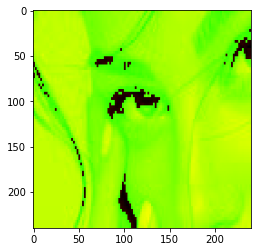

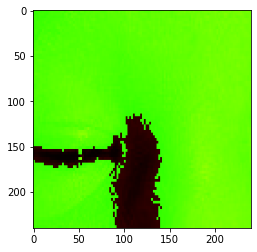

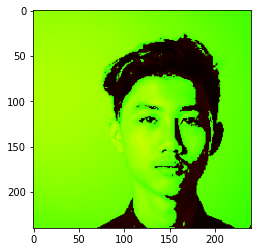

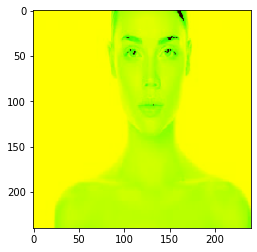

In [97]:
# Get a batch of data
batch = next(train_data)

# Extract the images and labels
images, labels = batch

# Print the shape of the data
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
for image in images[:9]:
  plt.figure()
  plt.imshow(image)


In [98]:
# create the model
import tensorflow
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout

num_classes = 2

# Load the VGG16 model
vgg16 = VGG16(weights="imagenet",  include_top=False, input_shape=(img_rows, img_cols, 3))

# Freeze the layers in the base model
for layer in vgg16.layers:
    layer.trainable = False

model = keras.Sequential([
    vgg16,
])
# Head

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                1605696   
                                                                 
 activation_12 (Activation)  (None, 64)                0         
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                      

In [99]:
from tensorflow.keras.optimizers import Adam
model.compile(
    loss="categorical_crossentropy",
     optimizer = Adam(lr=0.0001), 
     metrics = ["accuracy"]
     )

In [100]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Jaundice/jaundice_model_preprocessing.h5',
                             monitor='accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]
nb_train_samples = 341
epochs = 100
batch_size = 32

history = model.fit(
    train_data,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.9061 - accuracy: 0.6278
Epoch 1: accuracy improved from -inf to 0.62783, saving model to /content/drive/MyDrive/Jaundice/jaundice_model_preprocessing.h5
10/10 [==============================] - 10s 812ms/step - loss: 0.9061 - accuracy: 0.6278
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.6731
Epoch 2: accuracy improved from 0.62783 to 0.67314, saving model to /content/drive/MyDrive/Jaundice/jaundice_model_preprocessing.h5
10/10 [==============================] - 2s 203ms/step - loss: 0.8568 - accuracy: 0.6731
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.6433 - accuracy: 0.7411
Epoch 3: accuracy improved from 0.67314 to 0.74110, saving model to /content/drive/MyDrive/Jaundice/jaundice_model_preprocessing.h5
10/10 [==============================] - 2s 204ms/step - loss: 0.6433 - accuracy: 0.7411
Epoch 4/100
10/10 [==============================] - E

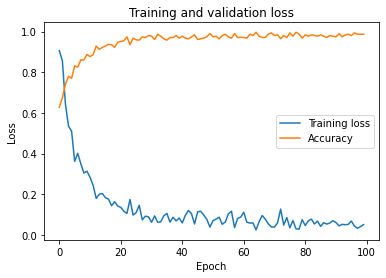

In [101]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Images shape: (32, 240, 240, 3)
Labels shape: (32, 2)
1/1 [==============================] - 0s 33ms/step


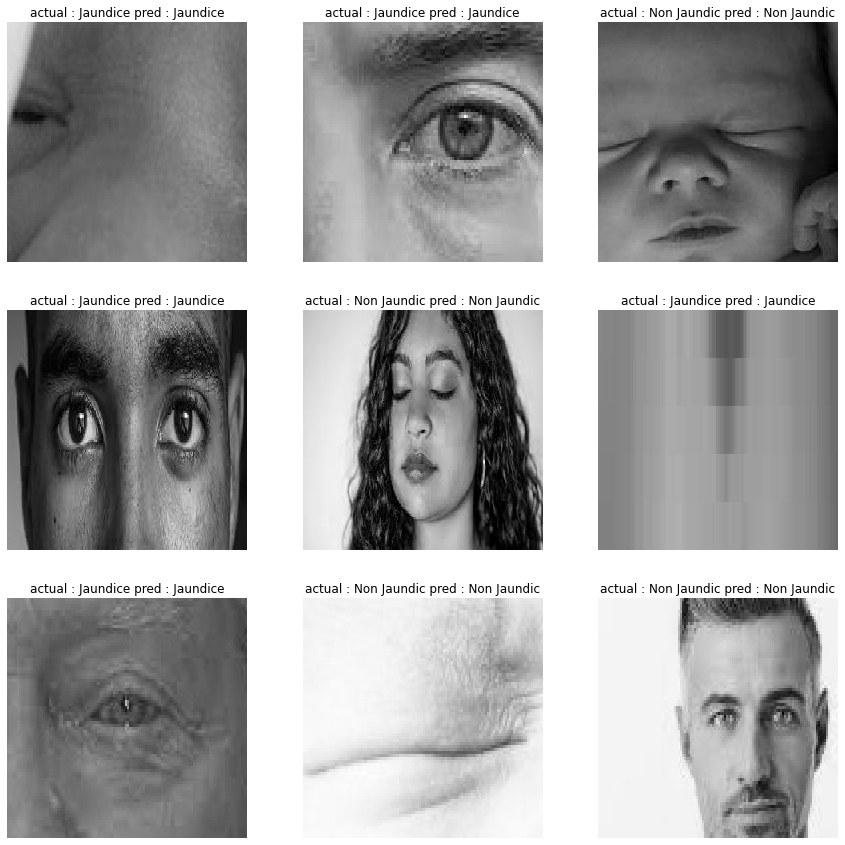

In [102]:
# Get a batch of data
batch = next(train_data)

# Extract the images and labels
images, labels = batch

# Print the shape of the data
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
class_names = ["Jaundice","Non Jaundic"]
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()
for image,label,ax in zip(images[:9],labels[:9],axs):
  img = cv2.cvtColor( image[:,:,0], cv2.COLOR_GRAY2RGB)
  ax.imshow(img)
  title = "actual : "+class_names[label.argmax()]
  input_image = np.reshape(image, (1,240,240,3))
  pred = model.predict(input_image)
  title = title + " pred : "+ class_names[pred.argmax()]
  ax.set_title(title)
  ax.axis("off")

In [103]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = "/content/drive/MyDrive/Jaundice/Jaundice_Dataset"

img_rows = 240
img_cols = 240
batch_size = 32
train_data = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    image_size=[img_rows, img_cols],
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
)

def preprocess_image(img):
    # Detect scelra
    scelra_image = detect_scelra(img)
    # Detect skin
    skin_image = detect_skin(img)
    # Convert the images to float
    scelra_image = scelra_image.astype('float32') / 255.0
    skin_image = skin_image.astype('float32') / 255.0
    img = img.astype('float32') / 255.0
    # Resize the images to match the VGG16 input size
    scelra_image = cv2.resize(scelra_image, (img_rows, img_cols))
    skin_image = cv2.resize(skin_image, (img_rows, img_cols))
    img = cv2.resize(img, (img_rows, img_cols))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Reshape the image to add the channel dimension
    img = img.reshape((240, 240, 1)) 
    # Stack the images along the channels axis
    img = np.dstack([img, scelra_image, skin_image])
    # Add a new axis for the batch dimension
    img = np.expand_dims(img, axis=0)
    return img

Found 341 files belonging to 2 classes.


1/1 [==============================] - 0s 23ms/step


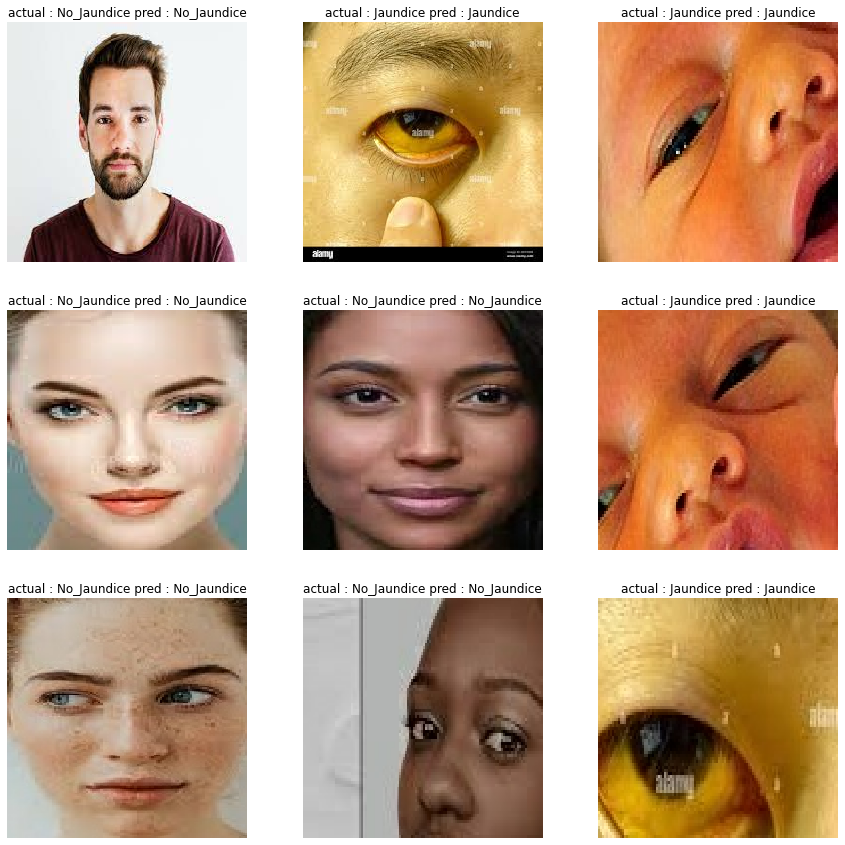

In [104]:
for images, labels in train_data.take(1):
  fig, axs = plt.subplots(3,3, figsize =(15,15))
  axs = axs.flatten()
  for img, ax,label in zip(images[:9], axs,labels):
    ax.imshow(img)
    img = img.numpy()
    title = "actual : "+train_data.class_names[label]
    input_image = np.reshape(preprocess_image(img), (1,240,240,3))
    pred = model.predict(input_image)
    title = title + " pred : "+ train_data.class_names[pred.argmax()]
    ax.set_title(title)
    ax.axis("off")
  plt.show()